**Applied Statistics and Inference**


1. What are Type I and Type II errors in hypothesis testing, and how do they
impact decision-making?
  -  Type I and Type II errors are two key concepts in hypothesis testing that represent different mistakes one can make when making a decision based on sample data. Their proper understanding is critical for decision-making in statistics and scientific research.
  .Impact on Decision-Making
Both errors directly impact how we interpret statistical results and make decisions:
-Type I errors can lead to false discoveries, accepting new findings that are not genuine, and can result in unnecessary changes or interventions.
-Type II errors may cause important effects or discoveries to be overlooked, leading to missed opportunities for improvement or treatment.


2.  What is the P-value in hypothesis testing, and how should it be interpreted
in the context of the null hypothesis?
  -  The P-value in hypothesis testing is a statistical measure that indicates the probability of obtaining results as extreme as the observed data, assuming the null hypothesis is true. It quantifies how compatible your sample data is with the assumption that there is no true effect or difference.
  -Interpretation of the P-value
-A small P-value (usually ≤ 0.05) suggests that the observed data is unlikely under the null hypothesis, providing strong evidence to reject the null hypothesis in favor of the alternative hypothesis.
-A large P-value (> 0.05) implies that the observed data is likely if the null hypothesis is true, meaning there isn't enough evidence to reject the null hypothesis.
-The P-value does not measure the probability that the null hypothesis is true, nor does it reflect the size or importance of an observed effect — it only assesses how well the sample data fits with the assumption of “no effect”.



3.  Explain the difference between a Z-test and a T-test, including when to use
each.
  -  Z-test
Used when the sample size is large (typically n≥30) and the population variance (or standard deviation) is known.
The test statistic follows the standard normal distribution (Z-distribution).
Commonly applied to hypothesis tests about means or proportions when underlying conditions are met.
Assumes the data is approximately normally distributed, or the sample is large enough for the Central Limit Theorem to apply.

T-test
Used when the sample size is small (usually n<30) and/or the population variance is unknown.
The test statistic follows Student’s t-distribution, which has heavier tails to account for added uncertainty from estimating the population variance using the sample.
Appropriate for scenarios where researchers have only a small sample and need to determine if means differ between groups or from a known value.
Still requires that the data are approximately normally distributed.



4.  What is a confidence interval, and how does the margin of error influence
its width and interpretation?
  -  A confidence interval is a range of values derived from sample data that is likely to contain the true value of a population parameter, such as a mean or proportion, with a specified degree of confidence (often 95%). Confidence intervals provide more information than a single point estimate by expressing the uncertainty or variability in the estimate.
  -influence on Interpretation
The width of the confidence interval directly impacts how precise your estimate is: wider intervals mean less precision, while narrower intervals offer more precision.
If you increase the confidence level (e.g., from 95% to 99%), the interval becomes wider, increasing the margin of error to ensure greater certainty.
A larger sample size decreases the margin of error, making the interval narrower and the estimate more reliable.


5.  Describe the purpose and assumptions of an ANOVA test. How does it
extend hypothesis testing to more than two groups?
  -  The purpose of an ANOVA (Analysis of Variance) test is to determine whether there are statistically significant differences between the means of three or more independent groups. It extends hypothesis testing beyond the two-group limitation of a t-test, allowing simultaneous comparisons of multiple groups using a single overall test, which helps control the risk of Type I errors from repeated pairwise testing.
  How ANOVA Extends Hypothesis Testing
Comparing More Than Two Groups: ANOVA tests the null hypothesis that all group means are equal (H0:μ1=μ2=...=μk), against the alternative that at least one group mean is different.
Omnibus Test: ANOVA indicates if a difference exists somewhere among the means, but it does not specify which groups are different—further post-hoc tests can determine specific group differences.
Controls Type I Error: By using a single test for all groups, ANOVA reduces the risk of incorrectly finding a difference (Type I error), which would be inflated if multiple t-tests were performed.

In [1]:
#6.Write a Python program to perform a one-sample Z-test and interpret theresult for a given dataset.
import numpy as np
from scipy.stats import norm

def one_sample_z_test(sample, population_mean, population_std, alpha=0.05):
    n = len(sample)
    sample_mean = np.mean(sample)
    standard_error = population_std / np.sqrt(n)
    z = (sample_mean - population_mean) / standard_error
    p_value = 2 * (1 - norm.cdf(abs(z)))  # two-tailed test
    if p_value < alpha:
        conclusion = 'Reject null hypothesis'
    else:
        conclusion = 'Fail to reject null hypothesis'
    result = {
        'sample_mean': sample_mean,
        'z_statistic': z,
        'p_value': p_value,
        'alpha': alpha,
        'conclusion': conclusion
    }
    return result

# Example data
sample_data = [17, 19, 18, 21, 20, 18, 16, 22, 20, 19]
population_mean = 18
population_std = 2
alpha = 0.05

output = one_sample_z_test(sample_data, population_mean, population_std, alpha)
print(output)


{'sample_mean': np.float64(19.0), 'z_statistic': np.float64(1.5811388300841895), 'p_value': np.float64(0.11384629800665813), 'alpha': 0.05, 'conclusion': 'Fail to reject null hypothesis'}


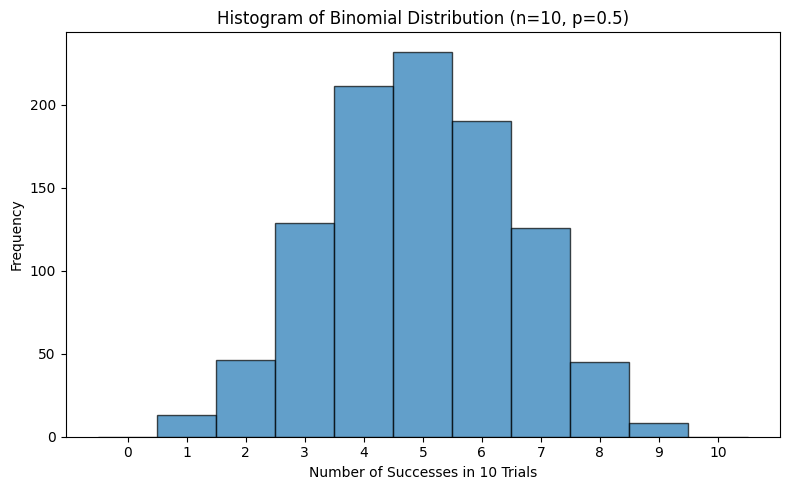

In [2]:
#7.Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using NumPy and plot the histogram.
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
n_trials = 10   # number of trials in each binomial experiment
p_success = 0.5 # probability of success on each trial
sample_size = 1000  # number of observations to simulate

# Simulate binomial data
binomial_data = np.random.binomial(n_trials, p_success, sample_size)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(binomial_data, bins=np.arange(-0.5, n_trials + 1.5, 1), edgecolor='black', alpha=0.7)
plt.title('Histogram of Binomial Distribution (n=10, p=0.5)')
plt.xlabel('Number of Successes in 10 Trials')
plt.ylabel('Frequency')
plt.xticks(range(n_trials + 1))
plt.tight_layout()
plt.show()


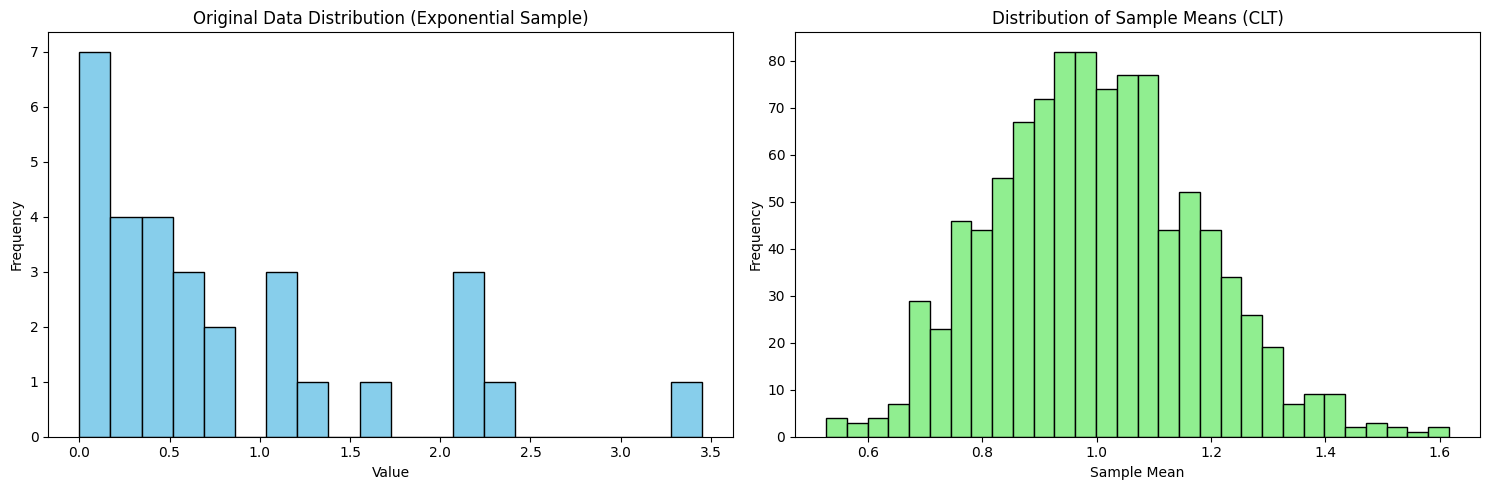

In [3]:
#8.Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python.
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(1)

# Parameters
sample_size = 30    # size of each sample
total_samples = 1000  # number of samples to generate

# Generate samples from an exponential distribution (which is non-normal)
data = np.random.exponential(scale=1.0, size=(total_samples, sample_size))

# Calculate sample means for each of the 1000 samples
sample_means = data.mean(axis=1)

# Plot histogram of the original data from the first sample
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(data[0], bins=20, color='skyblue', edgecolor='black')
plt.title('Original Data Distribution (Exponential Sample)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot histogram of the sample means to show the Central Limit Theorem effect
plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Sample Means (CLT)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


95% confidence interval: (47.390, 51.508)


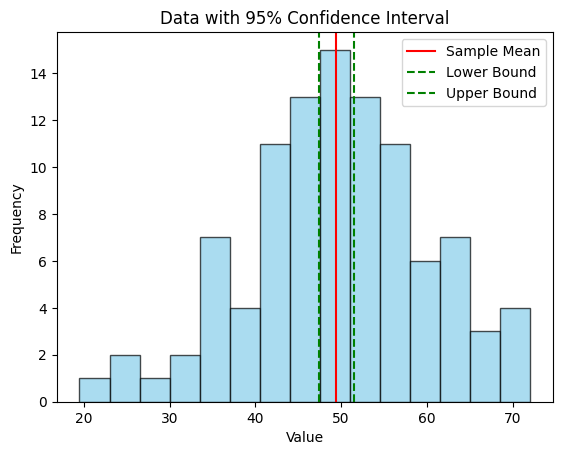

(np.float64(47.39044004048382), np.float64(51.508396788645776))

In [4]:
#9. Write a Python function to calculate and visualize the confidence interval for a sample mean.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    z_score = norm.ppf(1 - (1 - confidence) / 2)
    margin_of_error = z_score * std_err

    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    # Print the confidence interval
    print(f"{int(confidence*100)}% confidence interval: ({lower_bound:.3f}, {upper_bound:.3f})")

    # Plot the sample data histogram
    plt.hist(data, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(mean, color='red', linestyle='-', label='Sample Mean')
    plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
    plt.title(f'Data with {int(confidence*100)}% Confidence Interval')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    return (lower_bound, upper_bound)

# Example usage
sample_data = np.random.normal(loc=50, scale=10, size=100)
plot_confidence_interval(sample_data, confidence=0.95)


In [5]:
#10.Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.
import numpy as np
from scipy.stats import chisquare

# Observed frequencies (example data)
observed = np.array([50, 30, 20])

# Expected frequencies (hypothesized distribution)
expected = np.array([40, 40, 20])

# Perform Chi-square goodness-of-fit test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-square Statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: observed distribution differs significantly from expected.")
else:
    print("Fail to reject the null hypothesis: no significant difference between observed and expected distributions.")



Chi-square Statistic: 5.000
P-value: 0.082
Fail to reject the null hypothesis: no significant difference between observed and expected distributions.
